# Multiclass Classification

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [2]:
print(f"Training Data: {train_data[0]}")
print(f"Training labels: {train_labels[0]}")

Training Data: [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1

In [3]:
train_data[0].shape, train_labels[0].shape

((28, 28), ())

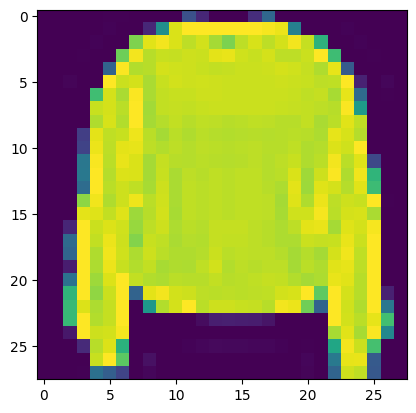

In [4]:
import matplotlib.pyplot as plt
plt.imshow(train_data[7])

In [5]:
# Create a small list so that we can index onto our training labels so they're human_readable
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# How many classes are there (this'll be our output shape)?
len(class_names)

10

Text(0.5, 1.0, 'Bag')

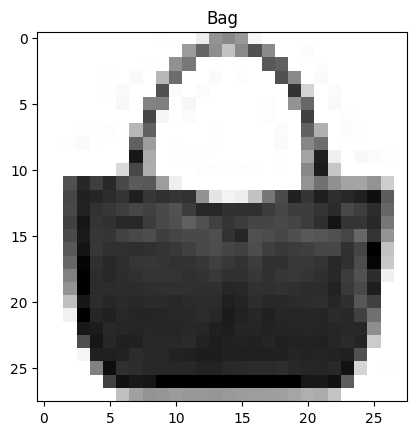

In [6]:
# Plot an example image and it's laebl
index_of_choice = 100
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

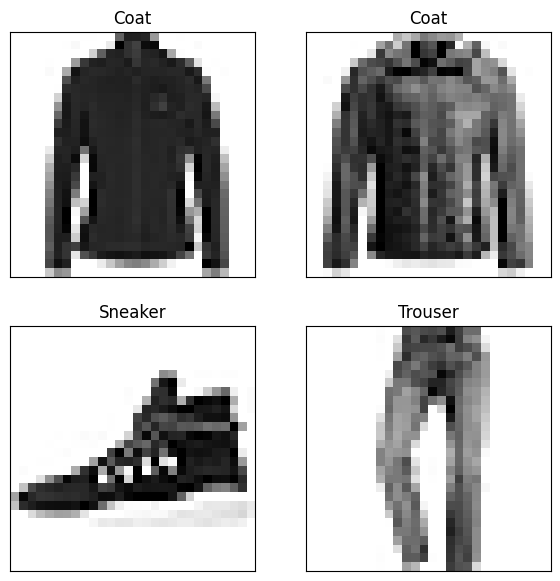

In [7]:
# Plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(7,7))
for i in range(4):
  ax = plt.subplot(2,2,i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  ax.axes.get_xaxis().set_visible(False)
  ax.axes.get_yaxis().set_visible(False)

* Input shape = 28x28 (the shape  of one image)
* Output shape = 10 (one per class of clothing)
* Loss function = tf.keras.losses.CategoricalCrossentrophy
* Output Layer activation = Softmax (not sigmoid)

In [8]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_11 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784, the Flatten layer does this for us)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # different loss function for multiclass classifcation
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
non_norm_history = model_11.fit(train_data,
                                train_labels,
                                epochs=10,
                                validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 2.0187 - accuracy: 0.1814 - val_loss: 1.7882 - val_accuracy: 0.2576
Epoch 2/10
1875/1875 [==============================] - 14s 7ms/step - loss: 1.6617 - accuracy: 0.3053 - val_loss: 1.5741 - val_accuracy: 0.3418
Epoch 3/10
1875/1875 [==============================] - 18s 10ms/step - loss: 1.5150 - accuracy: 0.3514 - val_loss: 1.4920 - val_accuracy: 0.3536
Epoch 4/10
1875/1875 [==============================] - 16s 8ms/step - loss: 1.4627 - accuracy: 0.3620 - val_loss: 1.4634 - val_accuracy: 0.3683
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4375 - accuracy: 0.3630 - val_loss: 1.4349 - val_accuracy: 0.3675
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4208 - accuracy: 0.3674 - val_loss: 1.4333 - val_accuracy: 0.3618
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4094 - accuracy: 0.3727 - val_loss: 1.4242 - val_accu

In [9]:
model_11.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 4)                 3140      
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
# Check min and max
train_data.min(), train_data.max()

(0, 255)

In [11]:
# We can get our training and test data between 0 and 1 by dividing by max
train_data_norm = train_data /  train_data.max()
test_data_norm = test_data /  train_data.max()
train_data_norm.min() , train_data_norm.max()

(0.0, 1.0)

In [12]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_12 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784, the Flatten layer does this for us)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # different loss function for multiclass classifcation
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
norm_history = model_12.fit(train_data_norm,
                                train_labels,
                                epochs=10,
                                validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.0078 - accuracy: 0.6190 - val_loss: 0.7919 - val_accuracy: 0.7062
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7285 - accuracy: 0.7332 - val_loss: 0.7303 - val_accuracy: 0.7506
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6704 - accuracy: 0.7634 - val_loss: 0.6904 - val_accuracy: 0.7579
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6349 - accuracy: 0.7805 - val_loss: 0.6577 - val_accuracy: 0.7765
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6112 - accuracy: 0.7890 - val_loss: 0.6585 - val_accuracy: 0.7831
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5915 - accuracy: 0.7963 - val_loss: 0.6408 - val_accuracy: 0.7826
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5791 - accuracy: 0.8007 - val_loss: 0.6291 - val_accuracy:

<Axes: title={'center': 'normalized data'}>

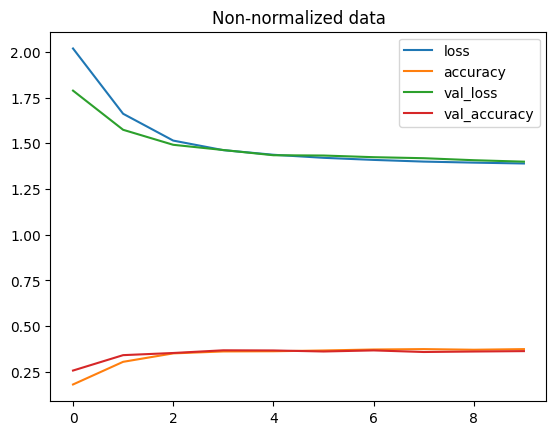

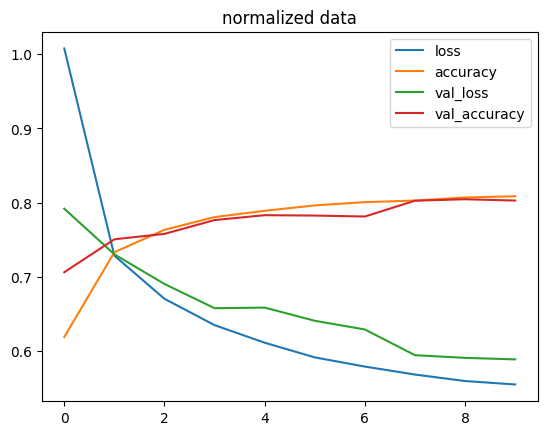

In [13]:
import pandas as pd
# Non- normalised data
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized data")

# Normalized data
pd.DataFrame(norm_history.history).plot(title="normalized data")

In [14]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_12 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784, the Flatten layer does this for us)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # different loss function for multiclass classifcation
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))
# Fit the model
norm_history = model_12.fit(train_data_norm,
                                train_labels,
                                epochs=40,
                                validation_data=(test_data_norm, test_labels),
                            callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 5s 2ms/step - loss: 1.2642 - accuracy: 0.5470 - val_loss: 0.8993 - val_accuracy: 0.6867 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7941 - accuracy: 0.7315 - val_loss: 0.7434 - val_accuracy: 0.7500 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6852 - accuracy: 0.7571 - val_loss: 0.6609 - val_accuracy: 0.7657 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6321 - accuracy: 0.7771 - val_loss: 0.6344 - val_accuracy: 0.7768 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6038 - accuracy: 0.7905 - val_loss: 0.6129 - val_accuracy: 0.7904 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5839 - accuracy: 0.7974 - val_loss: 0.6075 - val_accuracy: 0.7902 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 4s

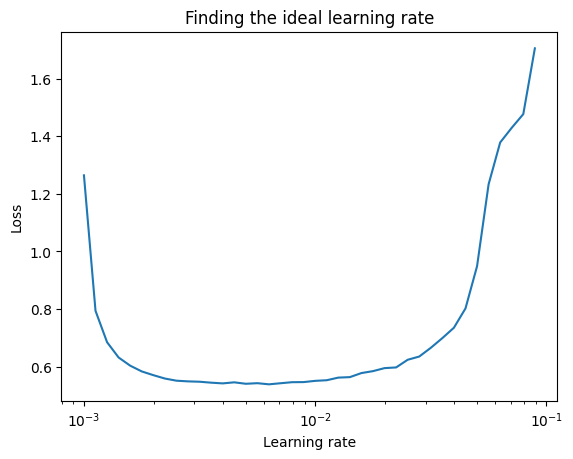

In [15]:
# Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt
lrs = 1e-3 * (10**(np.arange(40)/20))
plt.semilogx(lrs,norm_history.history["loss"]) # want the x-axis to be log-scale
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate");

In [16]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_14 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(lr=0.001), # ideal learning rate (same as default)
                 metrics=["accuracy"])

# Fit the model
history = model_14.fit(train_data,
                       train_labels,
                       epochs=20,
                       validation_data=(test_data, test_labels))

Epoch 1/20
1875/1875 [==============================] - 5s 2ms/step - loss: 2.2717 - accuracy: 0.1191 - val_loss: 2.1232 - val_accuracy: 0.1753
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 2.0851 - accuracy: 0.1667 - val_loss: 2.0301 - val_accuracy: 0.1674
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 1.9441 - accuracy: 0.2081 - val_loss: 1.7773 - val_accuracy: 0.2550
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7210 - accuracy: 0.2634 - val_loss: 1.6705 - val_accuracy: 0.2748
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6753 - accuracy: 0.2648 - val_loss: 1.6585 - val_accuracy: 0.2664
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 1.6534 - accuracy: 0.2733 - val_loss: 1.6330 - val_accuracy: 0.2861
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6601 - accuracy: 0.2677 - val_loss: 1.6328 - val_accuracy:

In [17]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):

  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes),
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)

  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

In [18]:
# Make predictions with the most recent model
y_probs = model_14.predict(test_data) # "probs" is short for probabilities

# View the first 5 predictions
y_probs[:5]

313/313 [==============================] - 1s 2ms/step


array([[3.8704843e-07, 3.7424582e-20, 2.9659677e-11, 9.5156083e-10,
        7.4957157e-10, 2.1022542e-01, 2.8308145e-08, 3.3855629e-01,
        1.8842714e-02, 4.3237513e-01],
       [1.6478652e-01, 1.6417335e-01, 1.6200592e-01, 1.6146342e-01,
        1.5852474e-01, 6.4327574e-04, 1.5913890e-01, 4.8812822e-06,
        2.9254640e-02, 4.3763298e-06],
       [1.6478652e-01, 1.6417335e-01, 1.6200592e-01, 1.6146342e-01,
        1.5852474e-01, 6.4327574e-04, 1.5913890e-01, 4.8812822e-06,
        2.9254640e-02, 4.3763298e-06],
       [1.6478652e-01, 1.6417335e-01, 1.6200592e-01, 1.6146342e-01,
        1.5852474e-01, 6.4327574e-04, 1.5913890e-01, 4.8812822e-06,
        2.9254640e-02, 4.3763298e-06],
       [1.6478652e-01, 1.6417335e-01, 1.6200592e-01, 1.6146342e-01,
        1.5852474e-01, 6.4327574e-04, 1.5913890e-01, 4.8812822e-06,
        2.9254640e-02, 4.3763298e-06]], dtype=float32)

In [19]:
y_probs[0].argmax(), class_names[y_probs[0].argmax()]

(9, 'Ankle boot')

In [20]:
# Convert all of the predictions from probabilities to labels
y_preds = y_probs.argmax(axis=1)

# View the first 10 prediction labels
y_preds[:10]

array([9, 0, 0, 0, 0, 0, 0, 0, 5, 7])

In [21]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels,
                 y_pred=y_preds)

array([[990,   0,   0,   0,   0,   1,   0,   0,   9,   0],
       [999,   0,   0,   0,   0,   0,   0,   0,   1,   0],
       [997,   0,   0,   0,   0,   0,   0,   0,   3,   0],
       [992,   0,   0,   0,   0,   1,   0,   0,   7,   0],
       [994,   0,   0,   0,   0,   0,   0,   0,   6,   0],
       [  1,   0,   0,   0,   0, 615,   0,  91, 122, 171],
       [992,   0,   0,   0,   0,   0,   0,   0,   8,   0],
       [  0,   0,   0,   0,   0,  43,   0, 833,   2, 122],
       [181,   0,   0,   0,   0, 355,   0,   6, 433,  25],
       [  1,   0,   0,   0,   0,  54,   0, 747,   4, 194]])

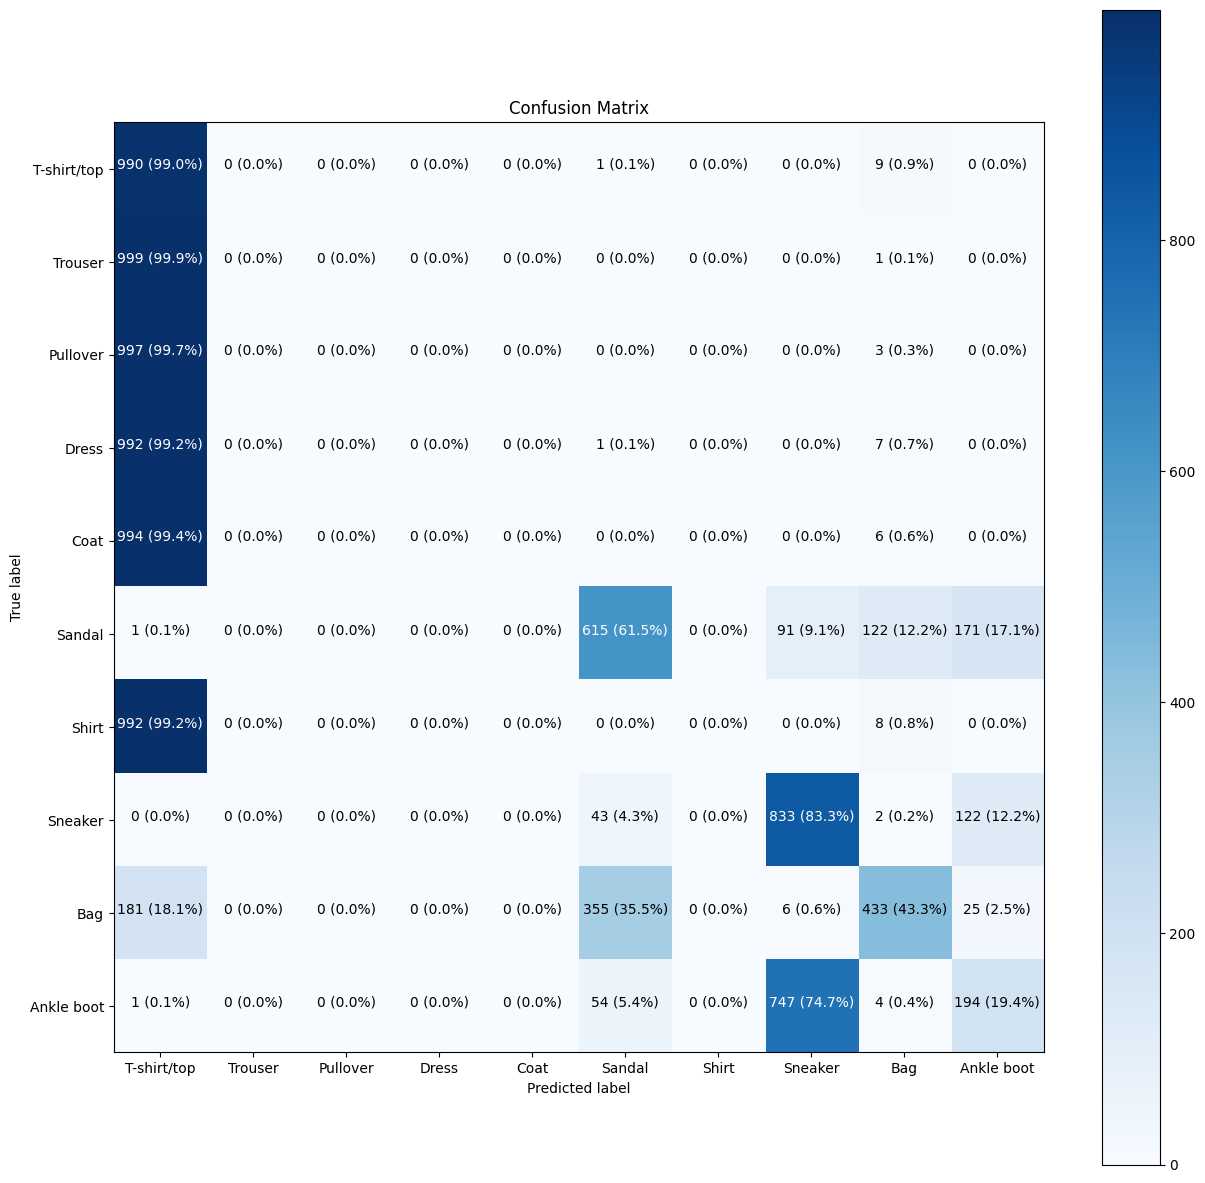

In [22]:
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

In [23]:
 import random

# Create a function for plotting a random image along with its prediction
def plot_random_image(model, images, true_labels, classes):
  # Setup random integer
  i = random.randint(0, len(images))

  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28)) # have to reshape to get into right size for model
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the target image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to green or red

1/1 [==============================] - 0s 23ms/step


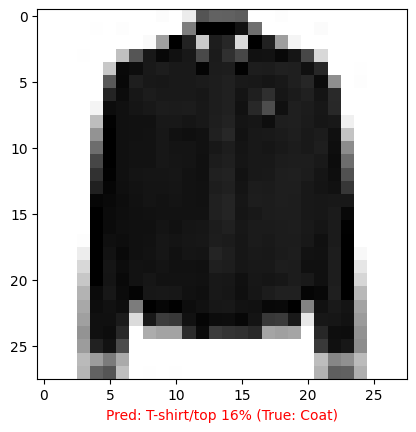

In [28]:
plot_random_image(model=model_14,
                  images=test_data,
                  true_labels=test_labels,
                  classes=class_names)